# COVID-19 Dataset
COVID-19 patient's symptoms, status, and medical history.

#  About Dataset

### Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. 
- Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
- During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. - In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- sex: female or male
- age: of the patient.
- classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
- patient type: hospitalized or not hospitalized.
- pneumonia: whether the patient already have air sacs inflammation or not.
- pregnancy: whether the patient is pregnant or not.
- diabetes: whether the patient has diabetes or not.
- copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- asthma: whether the patient has asthma or not.
- inmsupr: whether the patient is immunosuppressed or not.
- hypertension: whether the patient has hypertension or not.
- cardiovascular: whether the patient has heart or blood vessels related disease.
- renal chronic: whether the patient has chronic renal disease or not.
- other disease: whether the patient has other disease or not.
- obesity: whether the patient is obese or not.
- tobacco: whether the patient is a tobacco user.
- usmr: Indicates whether the patient treated medical units of the first, second or third level.
- medical unit: type of institution of the National Health System that provided the care.
- intubed: whether the patient was connected to the ventilator.
- icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- death: indicates whether the patient died or recovered.

In [1]:
#!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)


In [2]:
df= pd.read_csv('Covid_Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
#df['DATE_DIED']= pd.to_datetime(df['DATE_DIED'])
#df.info()

In [5]:
df['DATE_DIED'] .value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

### DATA PREPROCESSING

In [6]:
numerical = [var for var in df.columns if df[var].dtype != 'object']

print('There are {} numerical variables \n'.format(len(numerical)))

print('These are:', numerical)

There are 20 numerical variables 

These are: ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']


In [7]:
#Using a for loop to obtain the count values of the numerical data
for var in numerical:
    print(var, 'contains', len(df[var].unique()), 'unique values')

USMER contains 2 unique values
MEDICAL_UNIT contains 13 unique values
SEX contains 2 unique values
PATIENT_TYPE contains 2 unique values
INTUBED contains 4 unique values
PNEUMONIA contains 3 unique values
AGE contains 121 unique values
PREGNANT contains 4 unique values
DIABETES contains 3 unique values
COPD contains 3 unique values
ASTHMA contains 3 unique values
INMSUPR contains 3 unique values
HIPERTENSION contains 3 unique values
OTHER_DISEASE contains 3 unique values
CARDIOVASCULAR contains 3 unique values
OBESITY contains 3 unique values
RENAL_CHRONIC contains 3 unique values
TOBACCO contains 3 unique values
CLASIFFICATION_FINAL contains 7 unique values
ICU contains 4 unique values


In [8]:
df.columns.to_list()

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

In [9]:
selected_columns = ['SEX', 'PATIENT_TYPE','INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA',
                    'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'OBESITY', 'RENAL_CHRONIC',
                     'TOBACCO', 'ICU' ]
for var in selected_columns:
    print(var, df[var].value_counts())

SEX 1    525064
2    523511
Name: SEX, dtype: int64
PATIENT_TYPE 1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
INTUBED 97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
PNEUMONIA 2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
PREGNANT 97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64
DIABETES 2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64
COPD 2     1030510
1       15062
98       3003
Name: COPD, dtype: int64
ASTHMA 2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64
INMSUPR 2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64
HIPERTENSION 2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64
OTHER_DISEASE 2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64
OBESITY 2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64
RENAL_CHRONIC 2     1026665
1       18904
98       3006
Name: RENAL_

#### First, investigating the columns with 4 unique values as opposed to the expected 2 values.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


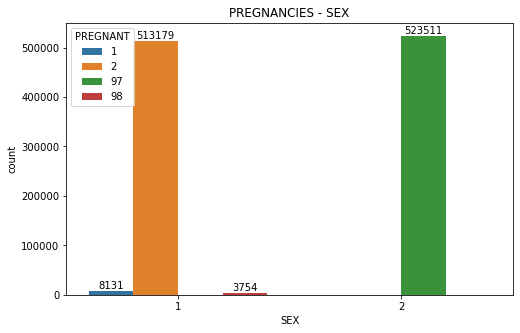

In [10]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX", fontsize = 12);

In [ ]:
df.PREGNANT = df.PREGNANT.replace(97, 2)
df.PREGNANT = df.PREGNANT.replace(98, 2)

In [ ]:
df.PREGNANT.value_counts()

In [13]:
df_female = df[df.SEX == 1]
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525064 entries, 0 to 1048569
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   USMER                 525064 non-null  int64 
 1   MEDICAL_UNIT          525064 non-null  int64 
 2   SEX                   525064 non-null  int64 
 3   PATIENT_TYPE          525064 non-null  int64 
 4   DATE_DIED             525064 non-null  object
 5   INTUBED               525064 non-null  int64 
 6   PNEUMONIA             525064 non-null  int64 
 7   AGE                   525064 non-null  int64 
 8   PREGNANT              525064 non-null  int64 
 9   DIABETES              525064 non-null  int64 
 10  COPD                  525064 non-null  int64 
 11  ASTHMA                525064 non-null  int64 
 12  INMSUPR               525064 non-null  int64 
 13  HIPERTENSION          525064 non-null  int64 
 14  OTHER_DISEASE         525064 non-null  int64 
 15  CARDIOVASCULAR  

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


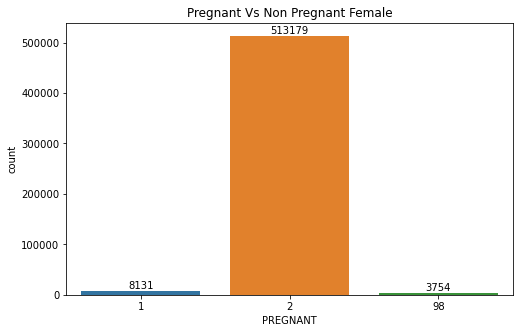

In [14]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df_female.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pregnant Vs Non Pregnant Female", fontsize = 12);

# **Make Pie Plot**

#### From the graph above, we noted that the gender male(2) which is colour coded 97 when considering pregancies is apt because males do not get pregnant. Among the female gender (1), we have colur code red with value 3,754 which are missing values for the pregnant status of these females. 
- So, we replaced the apparently non-pregnant males with 2 (not pregnant) and the few missing pregnancy status of the females with 2 (not pregnant) due to the mode of the categorical females being non-pregnant (513,179).
- Here, the sex and pregnancy features are independent variables.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


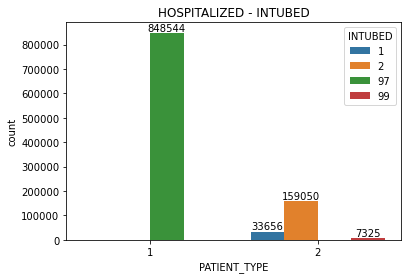

In [15]:
plt.figure()
ax = sns.countplot(df.PATIENT_TYPE, hue = df.INTUBED)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("HOSPITALIZED - INTUBED");

###### We believe there is a sort of mix-up in the definition for the patient_type column. 
- So, we opine that patient_type_1 means not hospitalized which is reasonable with the context provided that Coronavirus disease (COVID-19) is an infectious disease in which most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.
- Also, it is not really feasible for non-hospitalized patients to be intubed. Hence the patient_type_2 here means hospitalized patient which are now categorized into intubed patients(33 656), those that were hospitalized but not intubed (159 050) and then the missing data (7 325).
- The missing data can then be replaced with the modal option which is not intubed(2)

In [ ]:
df.INTUBED = df.INTUBED.replace(97, 2)
df.INTUBED = df.INTUBED.replace(99, 2)

In [ ]:
df.INTUBED.value_counts()

In [ ]:
plt.figure()
ax = sns.countplot(df.PATIENT_TYPE, hue = df.ICU)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("HOSPITALIZED - ICU");

###### Having determined previously that the patient_type_1 is for non-hospitalized patients. The data in this ICU further corroborates this argument. 
- So, for patient_type_2 which were hospitalized, we have 16 858 which were in the ICU, while 175 685 were not in the ICU.
- The missing data here is 7 488 for the ICU status of the patients that were hospitalized. We replace this with the mode which means not in ICU. This is further supported by the argument that most COVID-19 patients do not require an ICU.

In [ ]:
df.ICU = df.ICU.replace(97, 2)
df.ICU = df.ICU.replace(99, 2)

In [ ]:
df.ICU.value_counts()

In [16]:
df.CLASIFFICATION_FINAL.value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [24]:
# We are replacing the non-covid patients with 0
covid_positive= df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)
covid_positive= df.CLASIFFICATION_FINAL.replace([1,2,3],1)

In [25]:
covid_positive

0          1
1          0
2          1
3          0
4          1
          ..
1048570    0
1048571    0
1048572    0
1048573    0
1048574    0
Name: CLASIFFICATION_FINAL, Length: 1048575, dtype: int64

In [23]:
df.CLASIFFICATION_FINAL.value_counts()

0    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64

In [26]:
# Creating new column for covid of No-covid (0), covid (1)


def covid_positive(val):
    if val == 0:
        return 0
    else : 
        return 1


df['Covid'] = df['CLASIFFICATION_FINAL'].map(covid_positive)

df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Covid
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,1,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,0,97,0
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,1,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,0,97,0
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,1,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,0,97,0
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,0,2,0
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,0,97,0
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,0,97,0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


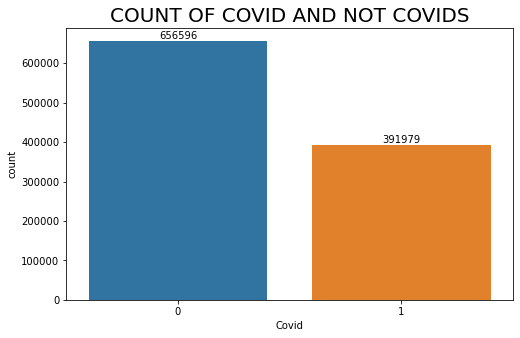

In [27]:
plt.figure(figsize = (8,5))
ax = sns.countplot(df.Covid)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("COUNT OF COVID AND NOT COVIDS", fontsize = 20);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


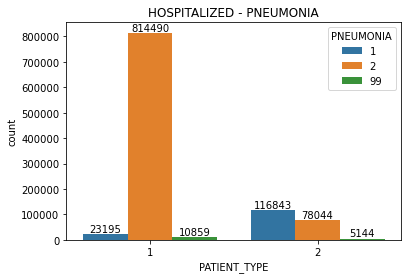

In [28]:
plt.figure()
ax = sns.countplot(df.PATIENT_TYPE, hue = df.PNEUMONIA)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("HOSPITALIZED - PNEUMONIA");

In [ ]:
plt.figure()
ax = sns.countplot(df.CLASIFFICATION_FINAL, hue = df.PNEUMONIA)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("COVID COUNT - PNEUMONIA");

In [ ]:
df

In [29]:
# Creating new column for type of Recovery (0), Death (1)


def death_numbers(val):
    if val == '9999-99-99':
        return 0
    else : 
        return 1


df['DEATH'] = df['DATE_DIED'].map(death_numbers)

df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,Covid,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,1,97,1,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,0,97,0,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,1,2,1,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,0,97,0,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,1,97,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,0,97,0,0
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,0,2,0,0
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,0,97,0,0
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,0,97,0,0


In [ ]:
df_death = df[df.DEATH == 1]


In [ ]:
df = df.drop('DATE_DIED', axis = 1)

In [ ]:
df

In [ ]:
df_death

In [ ]:
df_death.info()

In [ ]:
time_col = 'DATE_DIED'
df_death['DATE_DIED'] = pd.to_datetime(df_death.DATE_DIED, dayfirst=True, yearfirst=True, format="%d/%m/%Y")

In [ ]:
df_death.info()

In [ ]:
#extract the year 

df_death['Year'] = df_death['DATE_DIED'].dt.year
df_death['Year'] = df_death['DATE_DIED'].dt.year

In [ ]:
#extract the month 
df_death['Month'] = df_death['DATE_DIED'].dt.month
df_death['Month'] = df_death['DATE_DIED'].dt.month

In [ ]:
#extract the day
df_death['Day'] = df_death['DATE_DIED'].dt.day
df_death['Day'] = df_death['DATE_DIED'].dt.day

df_death.head()

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "Month", hue = "PATIENT_TYPE", data = df_death)
plt.title("Death Of COVID By Month in Hoepitalized and non hospiatlized patients", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
time_data = df_death.resample('M', on = time_col)['DEATH'].count().fillna(0)
time_data

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "Year", hue = "PATIENT_TYPE", data = df_death)
plt.title("Death Of COVID By Year in Hoepitalized and non hospiatlized patients", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(time_data)
plt.title('Deaths per Month');

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna(axis=0)


In [ ]:
df.isnull().sum()

In [ ]:
X = df.drop(['DEATH','Covid'],axis =1)
y= df['DEATH']

In [ ]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
X_train.columns

In [ ]:
X_train = pd.concat([X_train['AGE'], 
                    pd.get_dummies(X_train.USMER), 
                    pd.get_dummies(X_train.MEDICAL_UNIT),
                    pd.get_dummies(X_train.SEX), 
                    pd.get_dummies(X_train.PATIENT_TYPE),
                    pd.get_dummies(X_train.INTUBED),
                    pd.get_dummies(X_train.PNEUMONIA),
                    pd.get_dummies(X_train.PREGNANT),
                    pd.get_dummies(X_train.COPD),
                    pd.get_dummies(X_train.INMSUPR),
                    pd.get_dummies(X_train.OTHER_DISEASE),
                    pd.get_dummies(X_train.HIPERTENSION),
                    pd.get_dummies(X_train.CARDIOVASCULAR),
                    pd.get_dummies(X_train.OBESITY),
                    pd.get_dummies(X_train.RENAL_CHRONIC),
                    pd.get_dummies(X_train.TOBACCO),
                    pd.get_dummies(X_train.CLASIFFICATION_FINAL),
                    pd.get_dummies(X_train.ICU)],
                axis =1)

In [ ]:
X_train

In [ ]:
X_train

In [ ]:
X_test = pd.concat([X_test['AGE'], 
                    pd.get_dummies(X_test.USMER), 
                    pd.get_dummies(X_test.MEDICAL_UNIT),
                    pd.get_dummies(X_test.SEX), 
                    pd.get_dummies(X_test.PATIENT_TYPE),
                    pd.get_dummies(X_test.INTUBED),
                    pd.get_dummies(X_test.PNEUMONIA),
                    pd.get_dummies(X_test.PREGNANT),
                    pd.get_dummies(X_test.COPD),
                    pd.get_dummies(X_test.INMSUPR),
                    pd.get_dummies(X_test.OTHER_DISEASE),
                    pd.get_dummies(X_test.HIPERTENSION),
                    pd.get_dummies(X_test.CARDIOVASCULAR),
                    pd.get_dummies(X_test.OBESITY),
                    pd.get_dummies(X_test.RENAL_CHRONIC),
                    pd.get_dummies(X_test.TOBACCO),
                    pd.get_dummies(X_test.CLASIFFICATION_FINAL),
                    pd.get_dummies(X_test.ICU)],
                axis =1)

In [ ]:
X_test=X_test.dropna( axis=0)


In [ ]:
X_test

In [ ]:
X_test.shape,X_train.shape,y_train.shape

In [ ]:
#Model training 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

In [ ]:
#test data
y_pred_test = logreg.predict(X_test)

In [ ]:
y_pred_test

In [ ]:
y_pred_train = logreg.predict(X_train)

In [ ]:
y_pred_train 

In [ ]:
logreg.predict_proba(X_test)[:,0]

In [ ]:
logreg.predict_proba(X_test)[:,1]

In [ ]:
#check for accuracy 

from sklearn.metrics import accuracy_score

print('Model accuracy score(test): ', accuracy_score(y_test, y_pred_test))

#check for accuracy 

print('Model accuracy score(train): ', accuracy_score(y_train, y_pred_train))

In [ ]:
y_test.value_counts()

In [ ]:
#check null accuracy 
null_acuracy = 44152/(len(y_test))

In [ ]:
null_acuracy

Our null accuracy is 0.84 which is less than our actual accuracy(0.90). This means our model is not just predicting  the most frequent value, but it has actually learnt

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)

In [ ]:
cm

In [ ]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN))= ', cm[1, 1])

In [ ]:
#Precision
42543/(42543+3253)

In [ ]:
from sklearn.metrics import classification_report

#classification_report(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Probability of Death (0)',
                                                         'Probability of Recovery (1)'])

y_pred_prob_df

In [ ]:
y_pred1 = logreg.predict_proba(X_test)[:,1]
y_pred0 = logreg.predict_proba(X_test)[:,0]

In [ ]:
#plot ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

In [ ]:
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], '--')
plt.title('ROC curve for Probability of Death')
plt.xlabel('False positive rate')
plt.ylabel('True positve rate')
plt.show()

In [ ]:
#computing AUC 

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print(ROC_AUC)

Random Forest Classifier

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
# metrics are used to find accuracy or error
from sklearn import metrics  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
svc_model= SVC(kernel = 'poly')
svc_model.fit(X_train, y_train)
prediction= svc_model.predict(X_test)

In [ ]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

In [ ]:
print('Confusion Matrix: \n',
     confusion_matrix(prediction, y_test))

In [ ]:
# dividing the datasets into two parts i.e. training datasets and test datasets
#X, y = datasets.load_iris( return_X_y = True)
# Splitting arrays or matrices into random train and test subsets
#from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasetsX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
